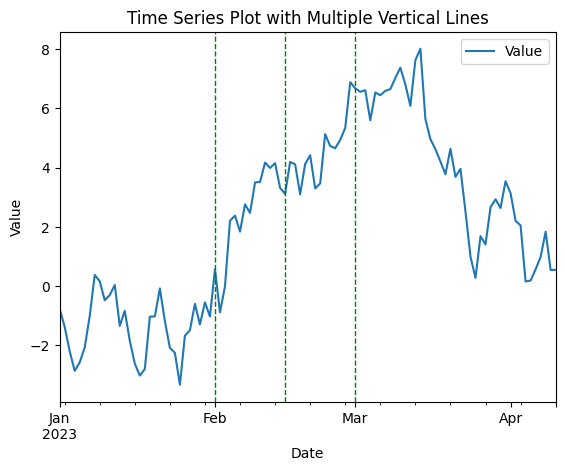

In [ ]:
# Specifying multiple dates for the vertical lines
event_dates = ['2023-02-01', '2023-02-15', '2023-03-01']
ax = df.plot()

# Adding multiple vertical lines
for event_date in event_dates:
    plt.axvline(x=event_date, color='green', linestyle='--', linewidth=1)

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Plot with Multiple Vertical Lines')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("chirag19/air-passengers")
import os

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/air-passengers


In [ ]:
df

Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121
1949-06-01         135
1949-07-01         148
1949-08-01         148
1949-09-01         136
1949-10-01         119
1949-11-01         104
1949-12-01         118
1950-01-01         115
1950-02-01         126
1950-03-01         141
1950-04-01         135
1950-05-01         125
1950-06-01         149
1950-07-01         170
1950-08-01         170
1950-09-01         158
1950-10-01         133
1950-11-01         114
1950-12-01         140
1951-01-01         145
1951-02-01         150
1951-03-01         178
1951-04-01         163
1951-05-01         172
1951-06-01         178
1951-07-01         199
1951-08-01         199
1951-09-01         184
1951-10-01         162
1951-11-01         146
1951-12-01         166

In [ ]:
df.head(500)

Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121
1949-06-01         135
1949-07-01         148
1949-08-01         148
1949-09-01         136
1949-10-01         119
1949-11-01         104
1949-12-01         118
1950-01-01         115
1950-02-01         126
1950-03-01         141
1950-04-01         135
1950-05-01         125
1950-06-01         149
1950-07-01         170
1950-08-01         170
1950-09-01         158
1950-10-01         133
1950-11-01         114
1950-12-01         140
1951-01-01         145
1951-02-01         150
1951-03-01         178
1951-04-01         163
1951-05-01         172
1951-06-01         178
1951-07-01         199
1951-08-01         199
1951-09-01         184
1951-10-01         162
1951-11-01         146
1951-12-01         166

In [ ]:
df.shape

(36, 1)

In [ ]:
# The 'Month' is already the index, so no need to set it again.
# The column name is 'Passengers', not 'Month'.
# Rename the column to match the seasonal decomposition cell if needed
# df = df.rename(columns={'Passengers': '#Passengers'}) # Uncomment if needed for other cells that use '#Passengers'

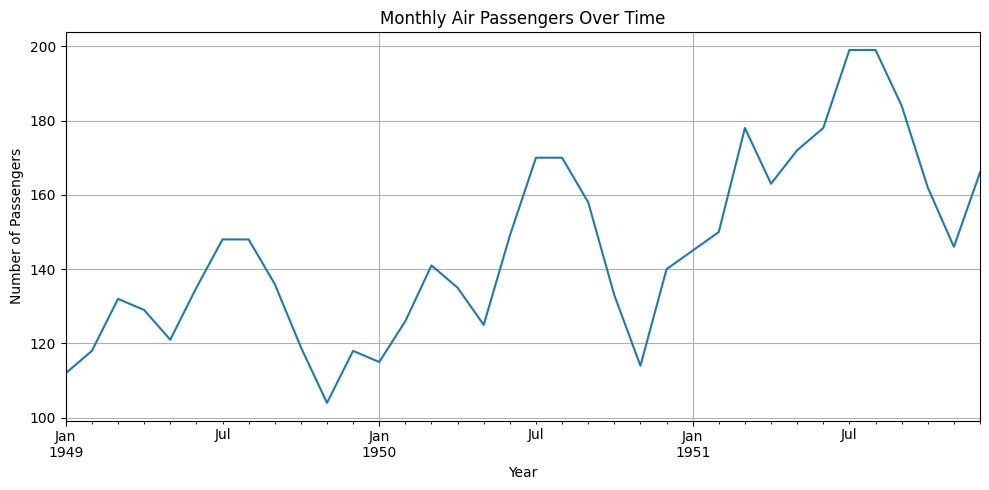

In [ ]:
import matplotlib.pyplot as plt

df.plot(figsize=(10, 5), title='Monthly Air Passengers Over Time', legend=False)
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.tight_layout()
plt.show()


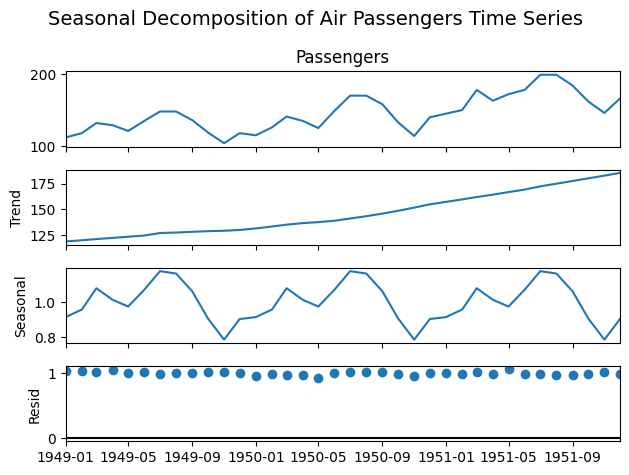

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Decompose the time series into trend, seasonal, and residual components
result = seasonal_decompose(df['Passengers'], model='multiplicative', extrapolate_trend='freq')

# Plot the decomposition
result.plot()
plt.suptitle('Seasonal Decomposition of Air Passengers Time Series', fontsize=14)
plt.tight_layout()
plt.show()

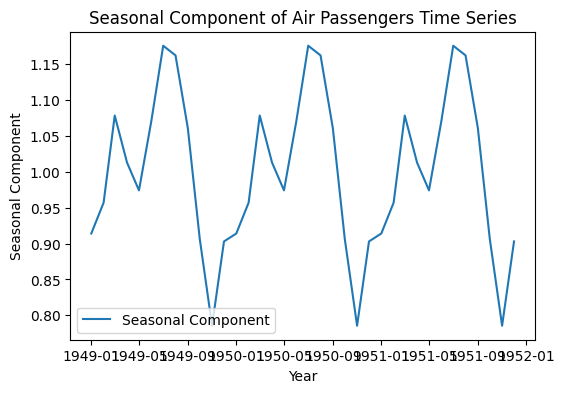

In [ ]:
# Plot the seasonal component
plt.figure(figsize=(6, 4))
plt.plot(result.seasonal, label='Seasonal Component')
plt.title('Seasonal Component of Air Passengers Time Series')
plt.xlabel('Year')
plt.ylabel('Seasonal Component')
plt.legend()
plt.show()

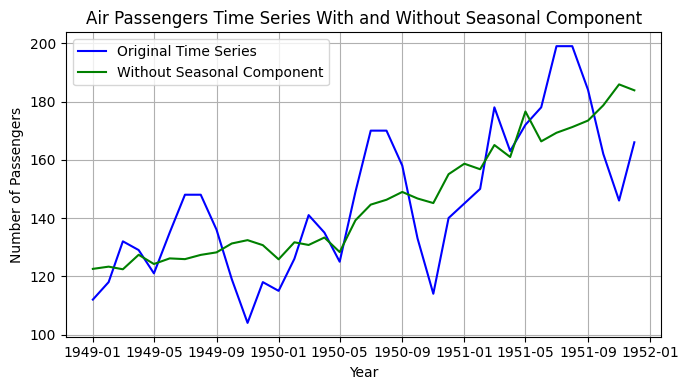

In [ ]:
import matplotlib.pyplot as plt

# Remove seasonal component
data_without_seasonal = df['Passengers'] / result.seasonal

# Plotting the original data and the data without the seasonal component
plt.figure(figsize=(7, 4))

# Plot original time series
plt.plot(df['Passengers'], label='Original Time Series', color='blue')

# Plot data without seasonal component
plt.plot(data_without_seasonal, label='Without Seasonal Component', color='green')

plt.title('Air Passengers Time Series With and Without Seasonal Component')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller

# Apply ADF test
result = adfuller(df['Passengers'])

# Print ADF test results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')


ADF Statistic: 1.2135410072229396
p-value: 0.996078116357932
Critical Values:
   1%: -3.7238633119999998
   5%: -2.98648896
   10%: -2.6328004


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


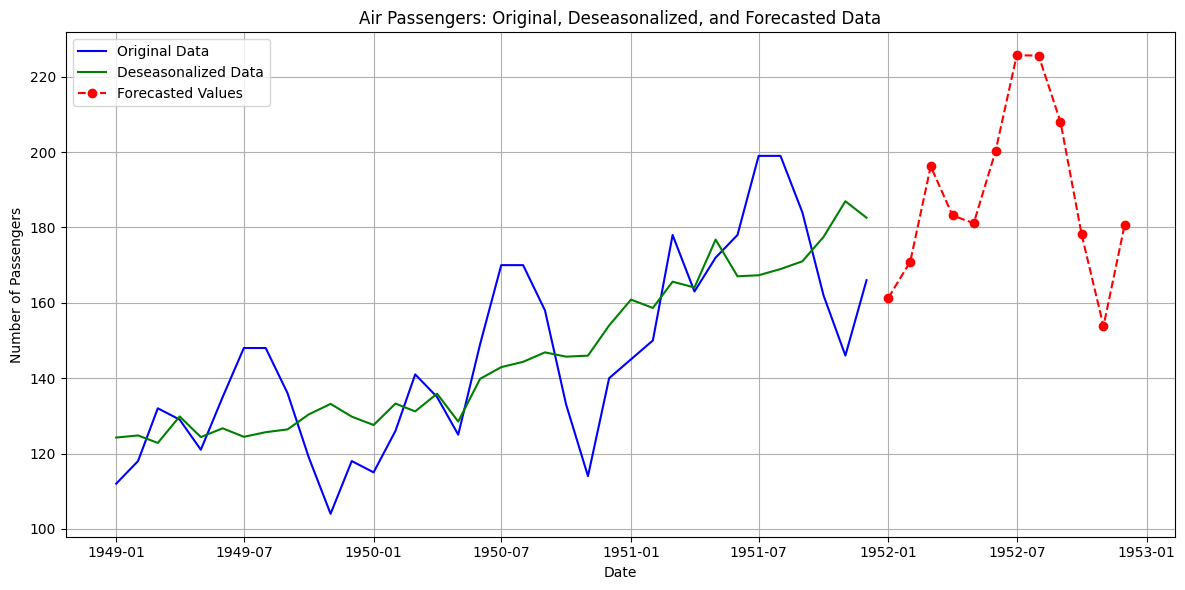

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression

# Load data
months = pd.date_range(start='1949-01', periods=36, freq='MS')
passengers = [
    112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118,
    115, 126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140,
    145, 150, 178, 163, 172, 178, 199, 199, 184, 162, 146, 166
]
df = pd.DataFrame({'Month': months, 'Passengers': passengers})
df.set_index('Month', inplace=True)

# Seasonal decomposition
result = seasonal_decompose(df['Passengers'], model='multiplicative', period=12)

# Deseasonalize the data
data_without_seasonal = df['Passengers'] / result.seasonal

# Prepare for regression
df_deseasonal = data_without_seasonal.dropna().reset_index()
df_deseasonal.rename(columns={0: 'Deseasonalized'}, inplace=True)
df_deseasonal['Time'] = np.arange(len(df_deseasonal))

X = df_deseasonal[['Time']]
y = df_deseasonal['Deseasonalized']

# Fit linear regression
model = LinearRegression()
model.fit(X, y)

# Forecast next 12 months
future_time = np.arange(len(df_deseasonal), len(df_deseasonal) + 12).reshape(-1, 1)
future_deseasonalized = model.predict(future_time)

# Reapply seasonality
future_months = pd.date_range(start=df.index[-1] + pd.offsets.MonthBegin(), periods=12, freq='MS')
future_seasonal = result.seasonal[-12:].values
future_forecast = future_deseasonalized * future_seasonal

# Create forecast DataFrame
forecast_df = pd.DataFrame({
    'Month': future_months,
    'Deseasonalized Forecast': future_deseasonalized,
    'Final Forecast': future_forecast
})

# Plot everything
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Passengers'], label='Original Data', color='blue')
plt.plot(df.index, data_without_seasonal, label='Deseasonalized Data', color='green')
plt.plot(forecast_df['Month'], forecast_df['Final Forecast'], label='Forecasted Values', color='red', linestyle='--', marker='o')
plt.title('Air Passengers: Original, Deseasonalized, and Forecasted Data')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
